<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 3</h3>
    <h5>Ejercicio 3</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

INICIO / PREPARACION DE BASE

Datos de sobre "Entrada total de visitantes a un Parque Nacional con cualquier finalidad principal -ocio, negocios u otro motivo personal- que no sea ser empleado por el Parque"

Fuente = https://datos.yvera.gob.ar/series/api/series/?ids=pn_visitantes_total

In [ ]:
# !pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math
from pmdarima import auto_arima

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/serie-tiempo-parques-nacionales-mensual.csv'
dataoriginal = pd.read_csv(url)

In [ ]:
data=dataoriginal.copy()

In [ ]:
data.head()

,indice_tiempo,no_residentes,residentes,total,buenos_aires_no_residentes,buenos_aires_residentes,buenos_aires_total,cordoba_no_residentes,cordoba_residentes,cordoba_total,...,cuyo_total,litoral_no_residentes,litoral_residentes,litoral_total,norte_no_residentes,norte_residentes,norte_total,patagonia_no_residentes,patagonia_residentes,patagonia_total
0,2008-01-01,198407,352303,550710,0,885,885,145,717,862,...,5144,55335,111408,166743,774,4241,5016,141973,230087,372060
1,2008-02-01,151809,283145,434953,0,624,624,148,475,623,...,4942,53596,85853,139449,1294,5099,6393,96632,186291,282923
2,2008-03-01,148533,173134,321667,0,0,0,147,741,888,...,5900,55130,59150,114280,1696,9204,10900,91382,98317,189699
3,2008-04-01,68558,61539,130097,0,462,462,166,539,705,...,1808,30827,23821,54648,728,3867,4595,36759,31121,67879
4,2008-05-01,43751,48787,92538,0,1091,1091,129,608,737,...,2402,29818,28538,58356,663,5083,5746,13038,11169,24206


In [ ]:
data.fecha = pd.to_datetime(data.indice_tiempo, dayfirst = True)
data.set_index("indice_tiempo", inplace=True)

<ipython-input-6-5b0657d20b7b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.fecha = pd.to_datetime(data.indice_tiempo, dayfirst = True)


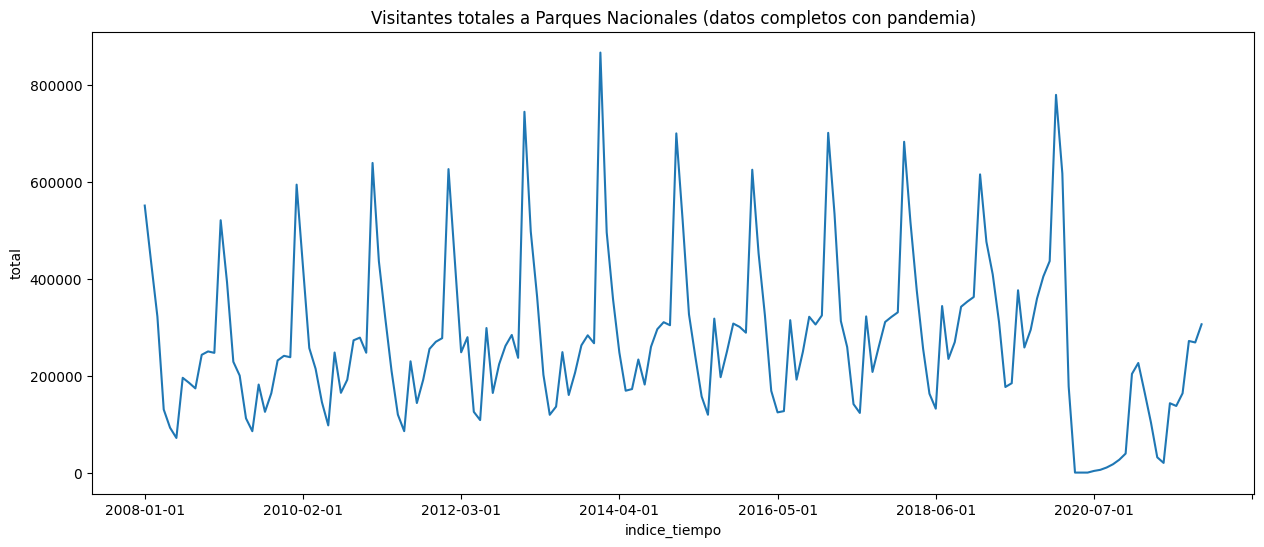

In [ ]:
data["total"].plot(figsize=(15, 6))
plt.xlabel("indice_tiempo")
plt.ylabel("total")
plt.title("Visitantes totales a Parques Nacionales (datos completos con pandemia)")
plt.show()

In [ ]:
data.drop(["2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01","2021-02-01","2021-03-01","2021-04-01","2021-05-01","2021-06-01","2021-07-01","2021-08-01","2021-09-01","2021-10-01","2021-11-01","2021-12-01"],axis=0, inplace=True)

In [ ]:
dataoriginal.drop([146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167],axis=0, inplace=True)

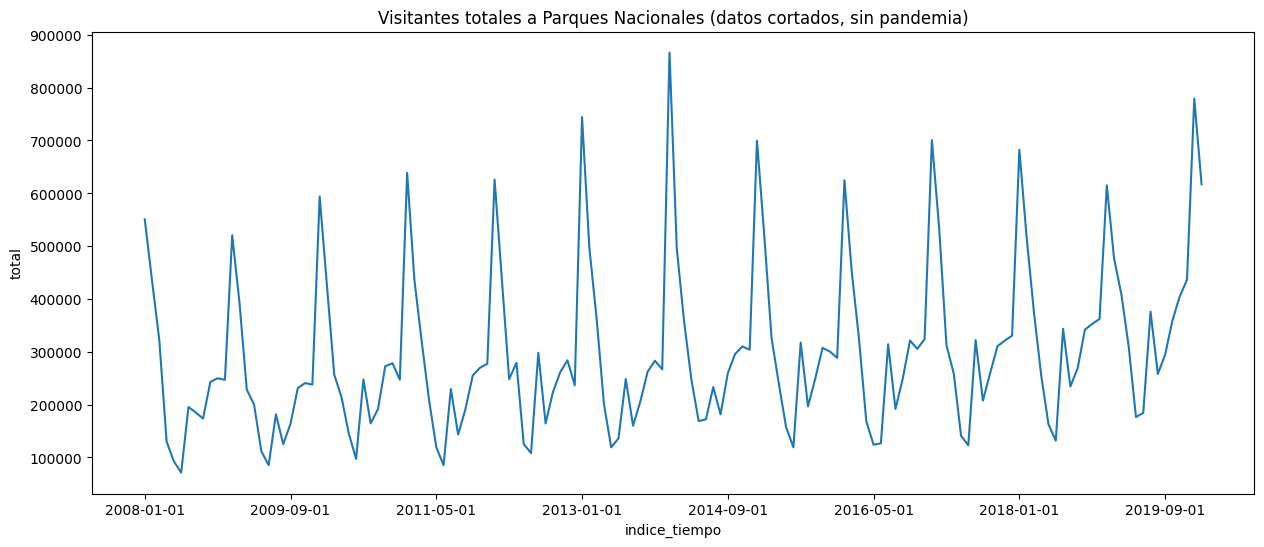

In [ ]:
data["total"].plot(figsize=(15, 6))
plt.xlabel("indice_tiempo")
plt.ylabel("total")
plt.title("Visitantes totales a Parques Nacionales (datos cortados, sin pandemia)")
plt.show()

Dividimos los datos en conjuntos de entrenamiento y prueba - Teniendo en cuenta las caracteristicas particulares de una serie de tiempo

In [ ]:
#Divido la serie de tiempo en entrenamiento y testeo ( manteniendo la cronologia )
train_len = len(data)-12 # Base de entrenamiento, total general menos los ultimos 12 periodos
train = data[0:train_len] # Primeros 134 meses para entrenamiento
test = data[train_len:] # Ultimos 12 meses para testeo

Algunos Métodos Simples de Forecasting

1 - Average Method

In [ ]:
numerado = train['total'].sum()
denominador = len(train)
resultado = numerado / denominador

In [ ]:
# predicion
test['prediccion_Average_M'] = resultado

<ipython-input-13-820325048c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediccion_Average_M'] = resultado


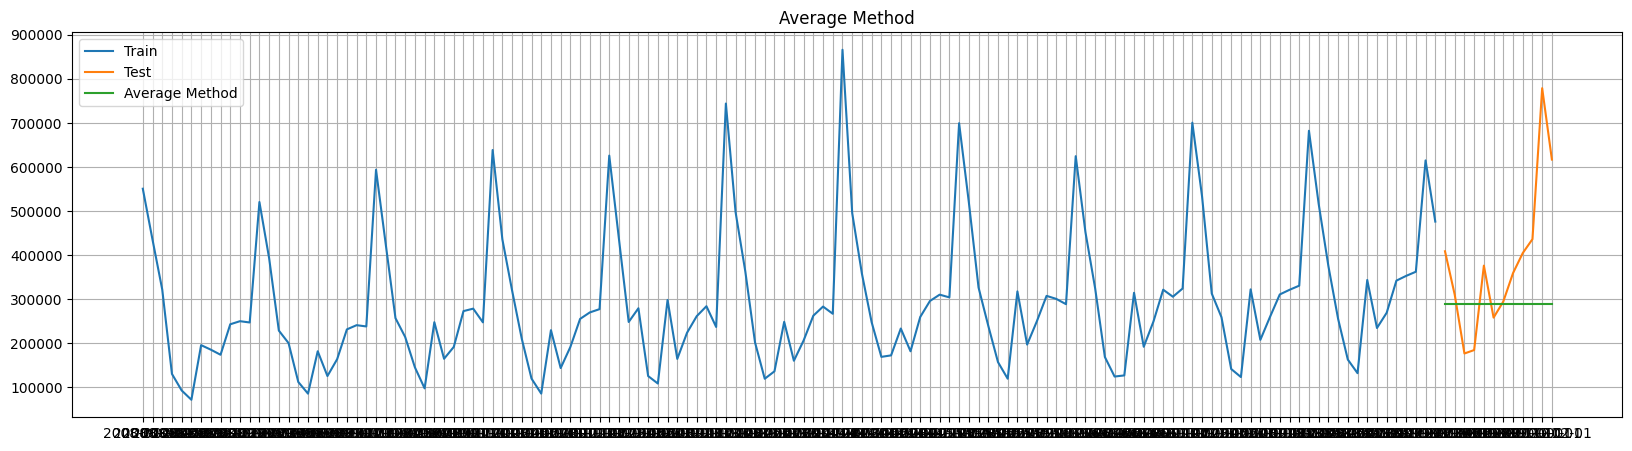

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Train')
plt.plot(test['total'], label='Test')
plt.plot(test['prediccion_Average_M'], label='Average Method')
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

Evaluación de la Performance del Pronóstico

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)

In [ ]:
MAE_AV_METHOD = mean_absolute_error(test['total'], test['prediccion_Average_M'])
RMSE_AV_METHOD = math.sqrt(MAE_AV_METHOD)
MAPE_AV_METHOD = mean_absolute_percentage_error(test['total'], test['prediccion_Average_M'])

In [ ]:
resultados_AV_METHOD = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD] ,'RMSE': [RMSE_AV_METHOD], 'MAPE': [MAPE_AV_METHOD]})
resultados_AV_METHOD = resultados_AV_METHOD[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_AV_METHOD

,Metodo,MAE,RMSE,MAPE
0,Average Method,135798.741294,368.508808,0.325999


2 Naïve Method

In [ ]:
test['prediccion_Naive_M'] = train['total'][train_len-1]

<ipython-input-17-65e0595ac0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediccion_Naive_M'] = train['total'][train_len-1]


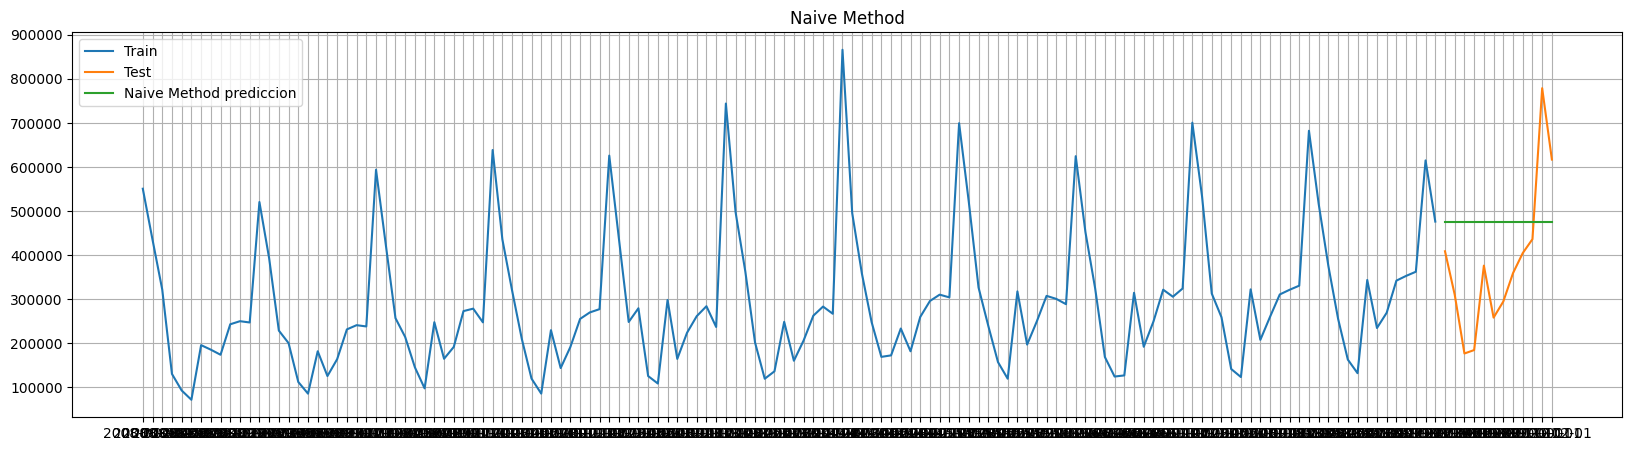

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Train')
plt.plot(test['total'], label='Test')
plt.plot(test['prediccion_Naive_M'], label='Naive Method prediccion')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

Evaluación de la Performance del Pronóstico

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)

In [ ]:
MAE_NAIVE_METHOD = mean_absolute_error(test['total'], test['prediccion_Naive_M'])
RMSE_NAIVE_METHOD = math.sqrt(MAE_NAIVE_METHOD)
MAPE_NAIVE_METHOD = mean_absolute_percentage_error(test['total'], test['prediccion_Naive_M'])

In [ ]:
resultados_NAIVE_METHOD = pd.DataFrame({'Metodo':['Naïve Method'],'MAE':[MAE_NAIVE_METHOD] ,'RMSE': [RMSE_NAIVE_METHOD], 'MAPE': [MAPE_NAIVE_METHOD]})
resultados_NAIVE_METHOD = resultados_NAIVE_METHOD[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_NAIVE_METHOD

,Metodo,MAE,RMSE,MAPE
0,Naïve Method,166393.666667,407.913798,0.576639


3- Seasonal Naïve Method

In [ ]:
def pysnaive(train_series,seasonal_periods,forecast_horizon):


    if len(train_series)>= seasonal_periods:

        last_season=train_series.iloc[-seasonal_periods:]

        reps=np.int(np.ceil(forecast_horizon/seasonal_periods))

        fcarray=np.tile(last_season,reps)

        fcast=pd.Series(fcarray[:forecast_horizon])

        fitted = train_series.shift(seasonal_periods)

    else:
        fcast=print("La duración del conjunto de entrenamiento debe ser mayor que el número de períodos estacionales")

    return fitted, fcast

In [ ]:
#Valores ajustados
py_snaive_fit = pysnaive(train["total"],
                     seasonal_periods=12,
                     forecast_horizon=12)[0]

#pronóstico
py_snaive = pysnaive(train["total"],
                     seasonal_periods=12,
                     forecast_horizon=12)[1]

test["prediccion_Naive_Estacional"] = py_snaive.values


test['prediccion_Naive_Estacional']

<ipython-input-21-8f89dd5c0d5b>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  reps=np.int(np.ceil(forecast_horizon/seasonal_periods))
<ipython-input-22-460c140259a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediccion_Naive_Estacional"] = py_snaive.values


indice_tiempo
2019-03-01    375114
2019-04-01    255251
2019-05-01    162690
2019-06-01    131788
2019-07-01    343475
2019-08-01    234412
2019-09-01    269061
2019-10-01    341995
2019-11-01    352751
2019-12-01    362144
2020-01-01    615016
2020-02-01    476074
Name: prediccion_Naive_Estacional, dtype: int64

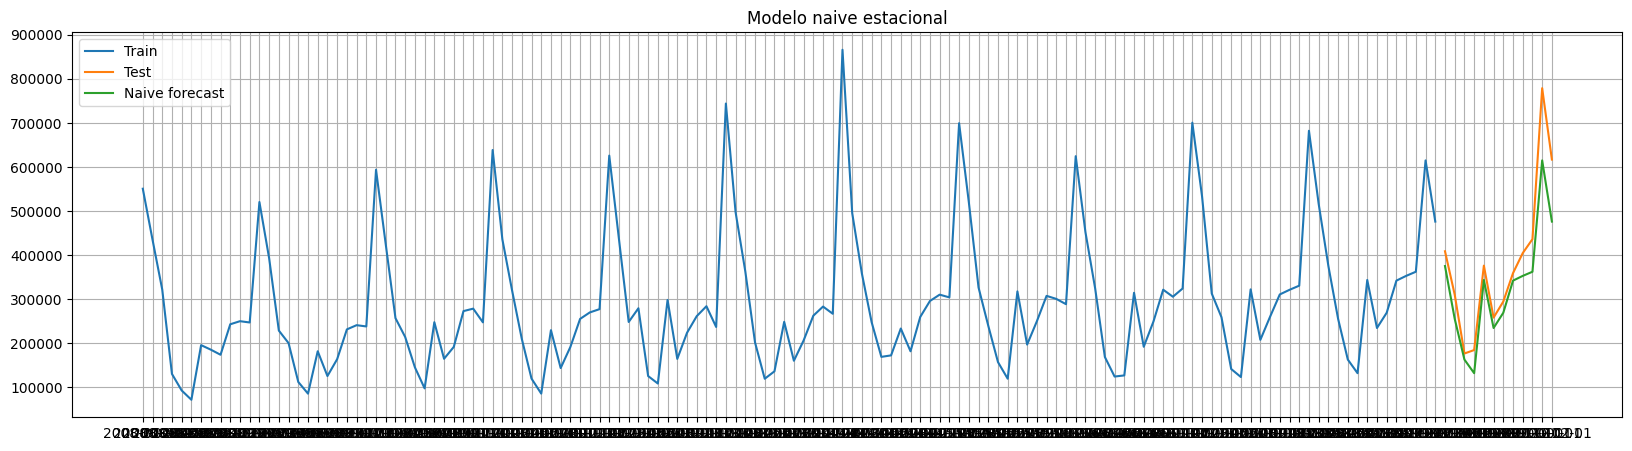

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Train')
plt.plot(test['total'], label='Test')
plt.plot(test['prediccion_Naive_Estacional'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Modelo naive estacional')
plt.show()

Evaluación de la Performance del Pronóstico

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)

In [ ]:
MAE_NAIVE_ESTACIONAL_METHOD = mean_absolute_error(test['total'], test['prediccion_Naive_Estacional'])
RMSE_NAIVE_ESTACIONAL_METHOD = math.sqrt(MAE_NAIVE_ESTACIONAL_METHOD)
MAPE_NAIVE_ESTACIONAL_METHOD = mean_absolute_percentage_error(test['total'], test['prediccion_Naive_Estacional'])

In [ ]:
resultados_NAIVE_ESTACIONAL_METHOD = pd.DataFrame({'Metodo':['Seasonal Naïve Method'],'MAE':[MAE_NAIVE_ESTACIONAL_METHOD] ,'RMSE': [RMSE_NAIVE_ESTACIONAL_METHOD], 'MAPE': [MAPE_NAIVE_ESTACIONAL_METHOD]})
resultados_NAIVE_ESTACIONAL_METHOD = resultados_NAIVE_ESTACIONAL_METHOD[['Metodo', 'MAE','RMSE', 'MAPE']]
resultados_NAIVE_ESTACIONAL_METHOD

,Metodo,MAE,RMSE,MAPE
0,Seasonal Naïve Method,56999.083333,238.744808,0.139217


4 - Drift Method

In [ ]:
#Divido la serie de tiempo en training y test
train_len = 134
train = data[0:train_len] # Primeros 134 meses para entrenamiento
trainoriginal= dataoriginal[0:train_len]  # adaptacion para poder correr el metodo drift
test = data[train_len:] # Ultimos 12 meses para testeo
testoriginal = dataoriginal[train_len:] # adaptacion para poder correr el metodo drift

In [ ]:
y_t = trainoriginal.loc[len(trainoriginal)-1]['total']
m = (y_t - trainoriginal.loc[0]['total']) / len(trainoriginal)
y_hat_drift = testoriginal.copy().drop('total', axis=1)
h = np.linspace(0,len(y_hat_drift)-1, len(y_hat_drift))
y_hat_drift['drift_forecast'] = y_t + m * h

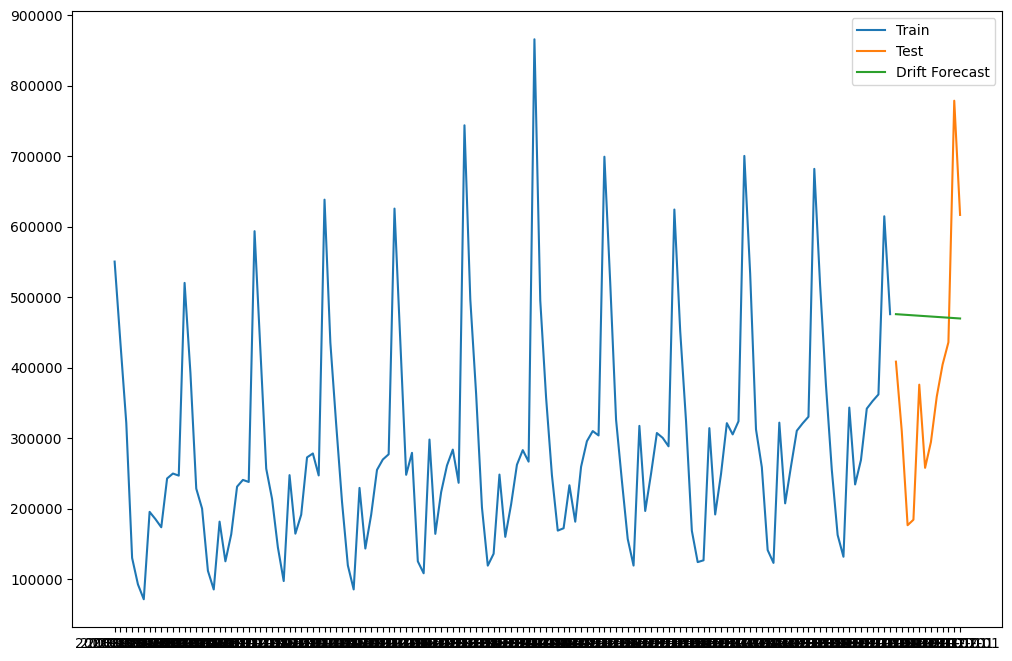

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(trainoriginal['indice_tiempo'], trainoriginal['total'], label='Train')
plt.plot(testoriginal['indice_tiempo'], testoriginal['total'], label='Test')
plt.plot(y_hat_drift['indice_tiempo'], y_hat_drift['drift_forecast'],
        label='Drift Forecast')
plt.legend(loc='best')
plt.show()

Evaluación de la Performance del Pronóstico

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)

In [ ]:
MAE_DRIFT_METHOD = mean_absolute_error(test['total'], y_hat_drift['drift_forecast'])
RMSE_DRIFT_METHOD = math.sqrt(MAE_DRIFT_METHOD)
MAPE_DRIFT_METHOD = mean_absolute_percentage_error(test['total'], y_hat_drift['drift_forecast'])

In [ ]:
resultados_DRIFT_METHOD = pd.DataFrame({'Metodo':['Drift Method'],'MAE':[MAE_DRIFT_METHOD] ,'RMSE': [RMSE_DRIFT_METHOD], 'MAPE': [MAPE_DRIFT_METHOD]})
resultados_DRIFT_METHOD

,Metodo,MAE,RMSE,MAPE
0,Drift Method,165279.696517,406.546057,0.571512


FIN DEL CODIGO - AHORA A RESOLVER EJERCICIO ASINCRONICO. GRACIAS